In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set(rc={'figure.figsize':(11, 4)})

In [3]:
con = sqlite3.connect('userdb.sqlite3')
cur = con.cursor()

# The user database

In [3]:
users = pd.read_sql_query('SELECT * FROM discordGuardiansToken', con)
users

,discordSnowflake,destinyID,signupDate,serverID,token,refresh_token
0,73386011039633408,4611686018468740696,1580649119,-1,None,None
1,98117080825475072,4611686018467293288,1580037823,-1,None,None
2,101082228666171392,4611686018467544385,1580075130,669293365900214293,None,None
3,108282146002608128,4611686018467952451,1580037854,-1,None,None
4,109016419059896320,4611686018467643119,1580037833,-1,None,None
5,109022023979667456,4611686018484825875,1574286941,556418279015448596,COL5ARKGAgAgXcCwhSNtaSj/+c7Hy/M1K2guWsCvKtvoq2...,COL5ARKGAgAgRNqjDdTaIbgGddzuDkOkWjXLDazLhHcK4W...
6,120993937463705600,4611686018484349672,1580037823,-1,None,None
7,151068170227023872,4611686018475494121,1580037869,-1,None,None
8,153159435466833921,4611686018467605174,1580037854,-1,None,None
9,153603850215882752,4611686018485458358,1580037823,-1,None,None


In [4]:
users.count()

discordSnowflake    57
destinyID           57
signupDate          57
serverID            57
token                3
refresh_token        3
dtype: int64

## The Markov Pairs

In [5]:
mp = pd.read_sql_query('SELECT * FROM markovPairs', con)
mp

,word1,word2
0,__start__,never
1,never,tried
2,tried,"them,"
3,"them,",although
4,although,glue
...,...,...
65063,Player,4337
65064,4337,
65065,,any
65066,any,gambiters?


In [6]:
mp.count()

word1    65068
word2    65068
dtype: int64

# Some User Analysis
### Data Cleanup

In [31]:
users = users[users.discordSnowflake != 4611686018468433098]
users['signupDate'] =  pd.to_datetime(users['signupDate'], unit='s')

In [57]:
usersTS = users.set_index('signupDate').sort_index(ascending=False)
usersTS['date'] = usersTS.index.date

#### When did people signup with the bot?

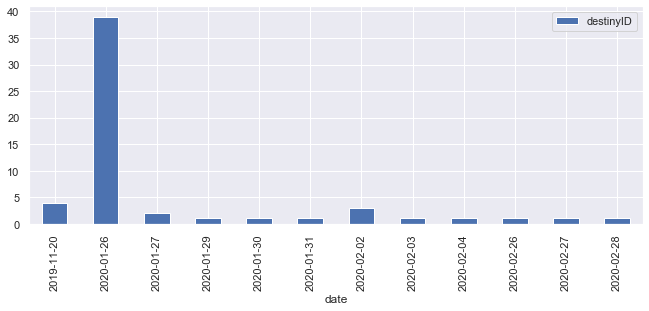

In [56]:
usersTS[['date', 'destinyID']].groupby('date').count().plot.bar()

In [8]:
cur.execute("""SELECT t1.instanceID, t1.period
                    FROM (  SELECT instanceID,period FROM activities
                            WHERE period < ?
                                AND mode = 4) t1
                    JOIN (  SELECT instanceID
                            FROM instancePlayerPerformance
                            WHERE playerID = ?
                            ) ipp 
                    ON (ipp.instanceID = t1.instanceID)
                    ORDER BY period DESC
                    LIMIT 1;""", (datetime.now(), 4611686018468695677))
print(cur.fetchall())


[(5838822270, '2020-03-08 19:13:27')]
